In [1]:
import networkx as nx
from networkx.generators.classic import empty_graph, path_graph, complete_graph
import random
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

Model A <br> Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.<br>
Model B <br > Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment. <br >

In [241]:
#We start from a connected graph with random edges
Gstart = nx.empty_graph(15)
while not nx.is_connected(Gstart):
    Gstart.add_edge(npr.randint(0,15),npr.randint(0,15))
nodes=Gstart.nodes()


In [242]:
len(Gstart.nodes())

15

In [4]:
def _random_subset(seq,m):
    """ Return m unique elements from seq.

    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.
    """
    targets=set()
    while len(targets)<m:
        x=random.choice(seq)
        targets.add(x)
    return targets

In [255]:
def model_A(n, m, seed=None):
    if n < 1 or  m>15:
        raise nx.NetworkXError("Model A network must hane n>1 and m<m0")
    
    if seed is not None:
        random.seed(seed)

    Gstart = nx.empty_graph(15)
    while not nx.is_connected(Gstart):
        Gstart.add_edge(npr.randint(0,15),npr.randint(0,15))
    G=Gstart
    targets=_random_subset(nx.nodes(G),m)
    source=len(G.nodes())
    while source<n:
        G.add_edges_from(zip([source]*m,targets))
        G.add_node(source)
        targets = _random_subset(nx.nodes(G),m)
        source += 1
    return G


In [254]:
nx.draw_networkmodel_A(20,5)

In [115]:
def model_B(t, n, seed=None):
    
    if n < 1 or  t<0:
        raise nx.NetworkXError("model B network must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n))
    if seed is not None:
        random.seed(seed)

    G=empty_graph(n)
    target=random.choice(G.nodes())
    repeated_nodes=list(G.nodes())
    i=1
    while i<=t:
        source=random.choice(G.nodes())
        #while source==targets[0] or G.has_edge(source,targets[0] ):
            #source=npr.randint(0,n+1)
        G.add_edge(source,target)
        repeated_nodes.append(target)
        repeated_nodes.append(source)
        target = random.choice(repeated_nodes)
        i+=1
    return G


In [219]:
G1=model_A(2000,5)

In [116]:
G2=model_B(100,1500)

## CDF/PDF

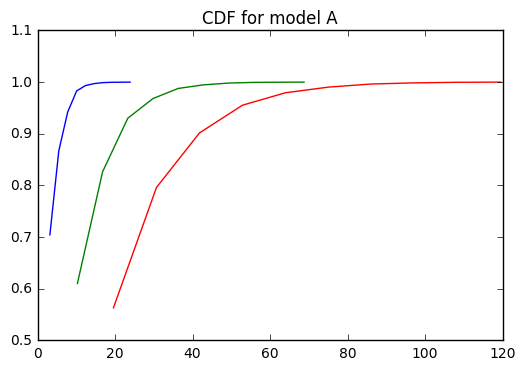

In [256]:
#cdf A
a=[]
b=[]
c=[]
for connect in m:
    values, base = np.histogram(list(model_A(15000,connect).degree().values()), bins=10, normed=True)
    bincenters = 0.5*(base[1:]+base[:-1])
    dx=base[1]-base[0]
    cumulative = np.cumsum(values)*dx
    a.append(values)
    b.append(bincenters)
    c.append(cumulative)
plt.plot(b[0], c[0])
plt.plot(b[1], c[1])
plt.plot(b[2], c[2])
plt.title('CDF for model A')
plt.show()

In [252]:
a[0]

array([  9.46736842e-02,   1.11578947e-03,   4.25964912e-03,
         2.43508772e-03,   1.28421053e-03,   6.45614035e-04,
         4.21052632e-04,   2.59649123e-04,   1.05263158e-04,
         6.31578947e-05])

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


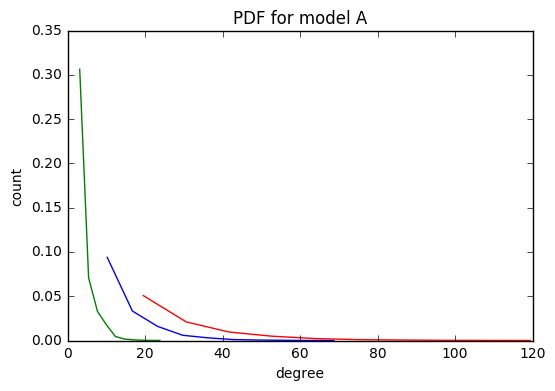

In [262]:
#pdf A
plt.plot(b[0], a[0], c='green')
plt.plot(b[1], a[1], c='b')
plt.plot(b[2], a[2], c='r')
plt.title('PDF for model A')
plt.xlabel(u'degree')
plt.ylabel(u'count')
plt.legend()
plt.show()

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


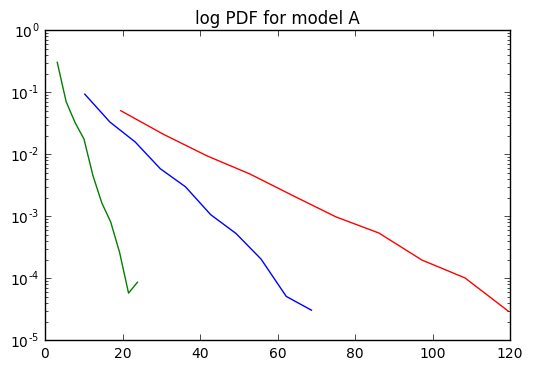

In [263]:
plt.semilogy(b[0], a[0], c='green')
plt.semilogy(b[1], a[1], c='b')
plt.semilogy(b[2], a[2], c='r')
plt.title('log PDF for model A')
plt.legend()
plt.show()

The probability that a new node links to a node with degree $k_i$ is $\frac{1}{m_0+t-1}$. The continuum theory predicts that for Model A $k_i
(t)$ increases logarithmically with time:  $\\
mln(e\frac{m_0+t-1}{m_0+t_i-1})$, slower than power law. Log-scale plot shows that the probability function is exponental law.

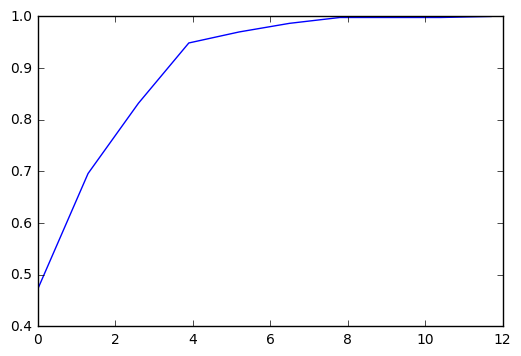

In [196]:
#cdf B
values, base = np.histogram(list(model_B(1500,1500).degree().values()), bins=10, normed=True)

dx=base[1]-base[0]
cumulative = np.cumsum(values)*dx
plt.plot(base[:-1], cumulative, c='blue')
plt.show()

In [216]:
values2, base2 = np.histogram(list(model_B(10000,1500).degree().values()), bins=10, normed=True)
values3, base3 = np.histogram(list(model_B(75000,1500).degree().values()), bins=10, normed=True)

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


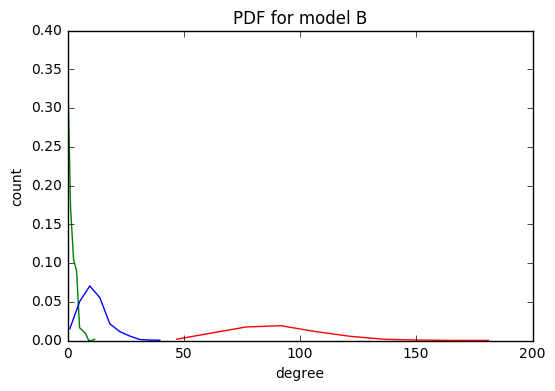

In [217]:
plt.plot(base[:-1], values, c='green')
plt.plot(base2[:-1], values2, c='b')
plt.plot(base3[:-1], values3, c='r')
plt.title('PDF for model B')
plt.xlabel(u'degree')
plt.ylabel(u'count')
plt.legend()
plt.show()

For each vertex the probability to be connected to a new one is proportional to $k_i/N$. 

Although the degree distribution in the beginning of modeling seems to be scale-free, it's unstable and in the end becomes nearly Gaussian as the network nears saturation.

The absence of preferential attachment leads to a growing
network with a stationary but exponential degree distribution. In contrast
the absence of growth leads to the loss of stationarity, forcing the network
to converge to a complete graph.

In [291]:
R=range(1000, 15000, 3000)#Number of nodes
m=[2,7,14]# how much links a new node has for model A
t=[4000, 6000, 1000] #how many links we will have in a model B network


## Path length (number of nodes)

## model A

In [264]:
a=[]
for connect in m:
    paths=[]
    for size in R:
        G=model_A(size, connect)
        paths.append(nx.average_shortest_path_length(G))
    a.append(paths)

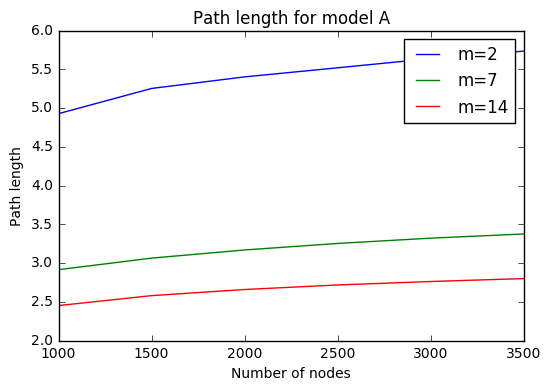

In [265]:
plt.plot(R, a[0], label = u'm=%d'% m[0])
plt.plot(R, a[1], label = u'm=%d'% m[1])
plt.plot(R, a[2], label = u'm=%d'% m[2])
plt.title('Path length for model A')
plt.xlabel(u'Number of nodes')
plt.ylabel(u'Path length')
plt.legend()
plt.show()

## model B

In [276]:
a=[]
for time in t:
    paths=[]
    for size in R:
        G=model_B(time, size)
        paths.append(shorty(G))
    a.append(paths)

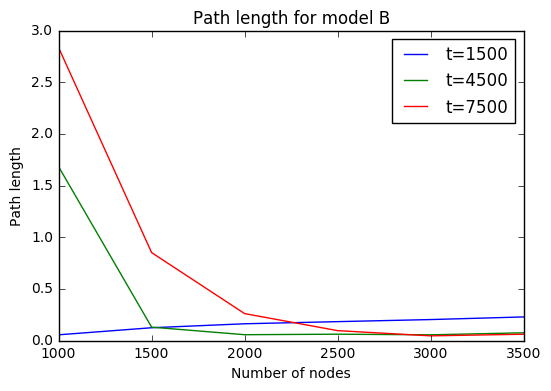

In [277]:
plt.plot(R, a[0], label = u't=%d'% t[0])
plt.plot(R, a[1], label = u't=%d'% t[1])
plt.plot(R, a[2], label = u't=%d'% t[2])
plt.title('Path length for model B')
plt.xlabel(u'Number of nodes')
plt.ylabel(u'Path length')
plt.legend()
plt.show()

# Clustering coefficients

## model A

In [268]:
#clustering coefficient(A)
a=[]
for connect in m:
    clusters=[]
    for size in R:
        G=model_A(size, connect)
        clusters.append(nx.average_clustering(G))
    a.append(clusters)

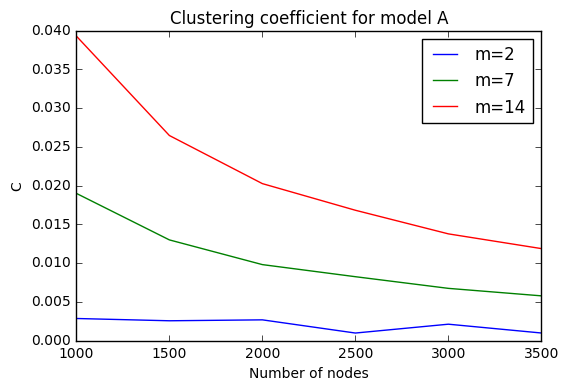

In [269]:
plt.plot(R, a[0], label = u'm=%d'% m[0])
plt.plot(R, a[1], label = u'm=%d'% m[1])
plt.plot(R, a[2], label = u'm=%d' %m[2])
plt.title('Clustering coefficient for model A')
plt.xlabel(u'Number of nodes')
plt.ylabel(u'C')
plt.legend()
plt.show()

## model B

In [278]:
#clustering coefficient(B)
a=[]
for time in t:
    clusters=[]
    for size in R:
        G=model_B(time, size)
        clusters.append(nx.average_clustering(G))
    a.append(clusters)

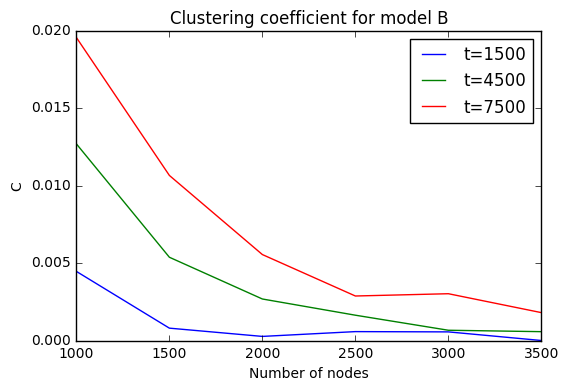

In [279]:
plt.plot(R, a[0], label = u't=%d'% t[0])
plt.plot(R, a[1], label = u't=%d'% t[1])
plt.plot(R, a[2], label = u't=%d'% t[2])
plt.title('Clustering coefficient for model B')
plt.xlabel(u'Number of nodes')
plt.ylabel(u'C')
plt.legend()
plt.show()

In Barabasi-Albert model clustering coefficcient is proportional to $N^{-0.75}$ which is remains here

## Age

## model A

In [7]:
def model_A_deg(n, m, seed=None):
    if n < 1 or  m>15:
        raise nx.NetworkXError("Model A network must hane n>1 and m<m0")
    
    if seed is not None:
        random.seed(seed)
    deg=[]
    Gstart = nx.empty_graph(15)
    while not nx.is_connected(Gstart):
        Gstart.add_edge(npr.randint(0,15),npr.randint(0,15))
    G=Gstart
    targets=_random_subset(nx.nodes(G),m)
    source=len(G.nodes())
    deg.append(np.sum(list(G.degree().values()))/len(list(G.degree().values())))
    while source<n:
        G.add_edges_from(zip([source]*m,targets))
        G.add_node(source)
        targets = _random_subset(nx.nodes(G),m)
        source += 1
        deg.append(np.sum(list(G.degree().values()))/len(list(G.degree().values())))
    return deg

In [9]:
start=15
N=15000
deg2=model_A_deg(N, start)

In [10]:
len(deg2)

14986

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


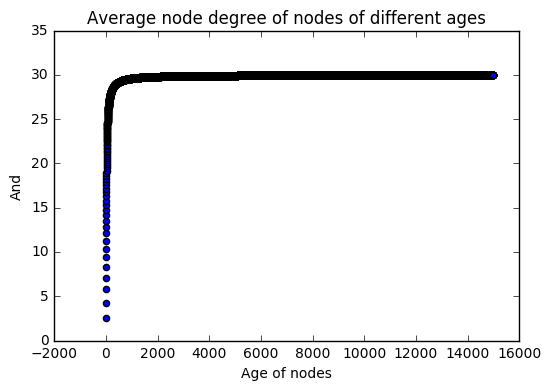

In [12]:
age=range(0,N-start+1)
plt.scatter(age, deg2)
plt.title('Average node degree of nodes of different ages')
plt.xlabel(u'Age of nodes')
plt.ylabel(u'And')
plt.legend()
plt.show()

In [306]:
def model_B_deg(t, n, seed=None):
    
    if n < 1 or  t<0:
        raise nx.NetworkXError("model B network must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n))
    if seed is not None:
        random.seed(seed)

    G=empty_graph(n)
    target=random.choice(G.nodes())
    repeated_nodes=list(G.nodes())
    i=1
    deg=[]
    deg.append(sum(G.degree().values())/len(G.degree()))
    while i<=t:
        source=random.choice(G.nodes())
        #while source==targets[0] or G.has_edge(source,targets[0] ):
            #source=npr.randint(0,n+1)
        G.add_edge(source,target)
        repeated_nodes.append(target)
        repeated_nodes.append(source)
        target = random.choice(repeated_nodes)
        deg.append(sum(G.degree().values())/len(G.degree()))
        i+=1
    return deg


In [308]:
G1=model_B_deg(15000,15000)

/Applications/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


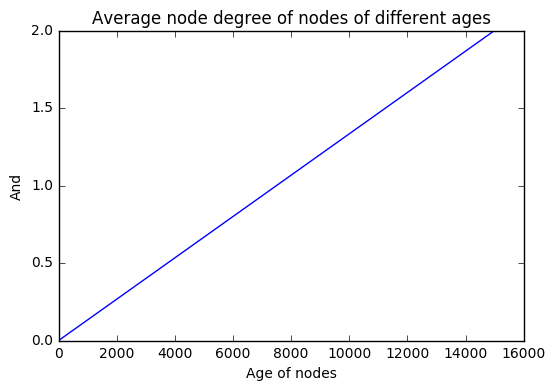

In [316]:
ageB=range(0,len(G1))
plt.plot(ageB, G1)
plt.title('Average node degree of nodes of different ages')
plt.xlabel(u'Age of nodes')
plt.ylabel(u'And')
plt.legend()
plt.show()

For large t the degree of each node also increases linearly with time <br>
$k_i=\frac{2}{N}t$ In each time step we add a new link, without changing the
number of nodes. 

# _____________________________________________________________end

In [ ]:
def model_B(t, n, seed=None):
    
    if n < 1 or  t<0:
        raise nx.NetworkXError("Barabási–Albert network must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n))
    if seed is not None:
        random.seed(seed)

    G=empty_graph(n)
    target=list(range(1))
    repeated_nodes=list(G.nodes())
    # Start adding the other n-m nodes. The first node is m.
    i=1
    while i<=t:
        # Add edges to m nodes from the source.
        source=npr.randint(0,n+1)
        while source==targets[0] or G.has_edge(source,targets[0] ):
            source=npr.randint(0,n+1)
        G.add_edges_from(zip([source],targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source])
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachement)
        targets = list(_random_subset(nx.nodes(G),1))
        i+=1
    return G


In [10]:
#def model_A(n, m, seed=None):
    
    
    if seed is not None:
        random.seed(seed)

    G=empty_graph(m)
    targets=list(range(m))
    repeated_nodes=[]
    source=m
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source]*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source]*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachement)
        targets = _random_subset(nx.nodes(G),m)
        source += 1
    return G



In [270]:
def shorty(G1):
    sh_path=[]
    for g in nx.connected_component_subgraphs(G1):
        try:
            sh_path.append(nx.average_shortest_path_length(g)) 
        except:
            sh_path.append(0)
    return np.mean(sh_path)